<img src="https://www.nlab.org.uk/wp-content/uploads/nlabmain.png" style="width:40%; clear:both; margin-bottom:-20px" align=left>
<br style="clear:both;"/>

## Analytics Specializations & Applications - Course Work 2

# Brand Analysis Using Twitter
----------
Student ID: 20543476 - Nottingham University business school (NUBS)

# Loading twitter data of Nike

In [ ]:
# Loading the twitter data and downloading the CSV file.
!wget -O nike.csv "https://drive.google.com/uc?export=download&id=1NzbOSXHuMCkqpDC-MiawOgwlRLKgNlix"


--2024-05-24 13:09:37--  https://drive.google.com/uc?export=download&id=1NzbOSXHuMCkqpDC-MiawOgwlRLKgNlix
Resolving drive.google.com (drive.google.com)... 173.194.213.102, 173.194.213.101, 173.194.213.138, ...
Connecting to drive.google.com (drive.google.com)|173.194.213.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1NzbOSXHuMCkqpDC-MiawOgwlRLKgNlix&export=download [following]
--2024-05-24 13:09:37--  https://drive.usercontent.google.com/download?id=1NzbOSXHuMCkqpDC-MiawOgwlRLKgNlix&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 108.177.12.132, 2607:f8b0:400c:c06::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|108.177.12.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1809095 (1.7M) [application/octet-stream]
Saving to: ‘nike.csv’

nike.csv            100%[===================>]   1.72M  --.-KB/s  

In [ ]:
#Loading in the data and displaying the first 10 lines
import pandas
data = pandas.read_csv("nike.csv")
data.head(10)

,author_id,statuses_count,location,verified,followers_count,friends_count,listed_count,favourites_count,tweet_id,text,created_at,lang,retweet_count,hashtags,favorite_count
0,1630000000000000000,2,Sweden,False,0,14,0,0,1630000000000000000,#Nike we open sone https://t.co/HkLHhgG7cc,23/02/2023 23:59,en,0,"[{'text': 'Nike', 'indices': [0, 5]}]",0
1,1270000000000000000,387,NaN,False,39,120,0,1381,1630000000000000000,Jordan year! #BHM #bhmkotd #nike #jordan #23 #...,23/02/2023 23:57,en,6,"[{'text': 'BHM', 'indices': [13, 17]}, {'text'...",31
2,1190000000000000000,409,NaN,False,19,23,0,22,1630000000000000000,Nike Dunk Low Teddy Bear\nDeadstock\nSize: 5W\...,23/02/2023 23:56,en,0,"[{'text': 'simplysneakers', 'indices': [56, 71...",0
3,1400000000000000000,393,NaN,False,177,188,0,795,1630000000000000000,Mapess – No Face Album Complet\n==) https://t...,23/02/2023 23:54,en,4,"[{'text': 'Mapess', 'indices': [65, 72]}, {'te...",5
4,1400000000000000000,393,NaN,False,177,188,0,795,1630000000000000000,Landy – BRAVE Album Complet\n==) https://t.c...,23/02/2023 23:54,en,4,"[{'text': 'landy', 'indices': [63, 69]}, {'tex...",5
5,1420000000000000000,1030,"Denver, CO",False,265,234,1,42,1630000000000000000,Frank Ocean Performing “Nikes” 👟\n\n#FrankOcea...,23/02/2023 23:45,en,0,"[{'text': 'FrankOcean', 'indices': [34, 45]}, ...",2
6,1610000000000000000,3156,NaN,False,22,126,0,4,1630000000000000000,#TravisScott x #Nike #SBDunk Low Premium Speci...,23/02/2023 23:45,en,0,"[{'text': 'TravisScott', 'indices': [0, 12]}, ...",0
7,1420000000000000000,1030,"Denver, CO",False,265,234,1,42,1630000000000000000,"The Nike Dunk Low ""What The Super Mario"" Conce...",23/02/2023 23:44,en,0,"[{'text': 'Nike', 'indices': [52, 57]}, {'text...",0
8,27523638,93687,"iPhone: 35.235878,-80.918423",False,1288,187,60,1782,1630000000000000000,3.10 miles in 23.34 Mins 7.36 Pace #fitness #f...,23/02/2023 23:43,en,0,"[{'text': 'fitness', 'indices': [35, 43]}, {'t...",0
9,1580000000000000000,276,"Philadelphia, PA",False,29,101,0,399,1630000000000000000,I’m cautiously optimistic about #nike and the ...,23/02/2023 23:43,en,0,"[{'text': 'nike', 'indices': [32, 37]}, {'text...",0


# Data Preprocessing

In [ ]:
# Dropping the languages column as it is not necessary since the language is only English
data.drop(columns=['lang'], inplace=True)

In [ ]:
# Check for null values in all columns
null_counts = data.isnull().sum()
print("Number of null values in each column:\n", null_counts)

Number of null values in each column:
 author_id             0
statuses_count        0
location            977
verified              0
followers_count       0
friends_count         0
listed_count          0
favourites_count      0
tweet_id              0
text                  0
created_at            0
retweet_count         0
hashtags              0
favorite_count        0
dtype: int64


In [ ]:
# 977 entries are missing in the location the column and many of the entries had little to no meaning so we will be dropping the column.
data.drop('location',axis=1, inplace = True)

In [ ]:
data.shape[0]

3000

In [ ]:
data.head(5)

,author_id,statuses_count,verified,followers_count,friends_count,listed_count,favourites_count,tweet_id,text,created_at,retweet_count,hashtags,favorite_count
0,1630000000000000000,2,False,0,14,0,0,1630000000000000000,#Nike we open sone https://t.co/HkLHhgG7cc,23/02/2023 23:59,0,"[{'text': 'Nike', 'indices': [0, 5]}]",0
1,1270000000000000000,387,False,39,120,0,1381,1630000000000000000,Jordan year! #BHM #bhmkotd #nike #jordan #23 #...,23/02/2023 23:57,6,"[{'text': 'BHM', 'indices': [13, 17]}, {'text'...",31
2,1190000000000000000,409,False,19,23,0,22,1630000000000000000,Nike Dunk Low Teddy Bear\nDeadstock\nSize: 5W\...,23/02/2023 23:56,0,"[{'text': 'simplysneakers', 'indices': [56, 71...",0
3,1400000000000000000,393,False,177,188,0,795,1630000000000000000,Mapess – No Face Album Complet\n==) https://t...,23/02/2023 23:54,4,"[{'text': 'Mapess', 'indices': [65, 72]}, {'te...",5
4,1400000000000000000,393,False,177,188,0,795,1630000000000000000,Landy – BRAVE Album Complet\n==) https://t.c...,23/02/2023 23:54,4,"[{'text': 'landy', 'indices': [63, 69]}, {'tex...",5


Removing HTTP and nike from the Nike dataset

In [ ]:
# The occurence of nike and http will be seen a lot as we are using the Nike dataset. Hence, these have been taken out for better analysis.
data['text'] = data['text'].str.replace('http', '')
data['text'] = data['text'].str.replace('nike', '')


Counting the number of verified users.

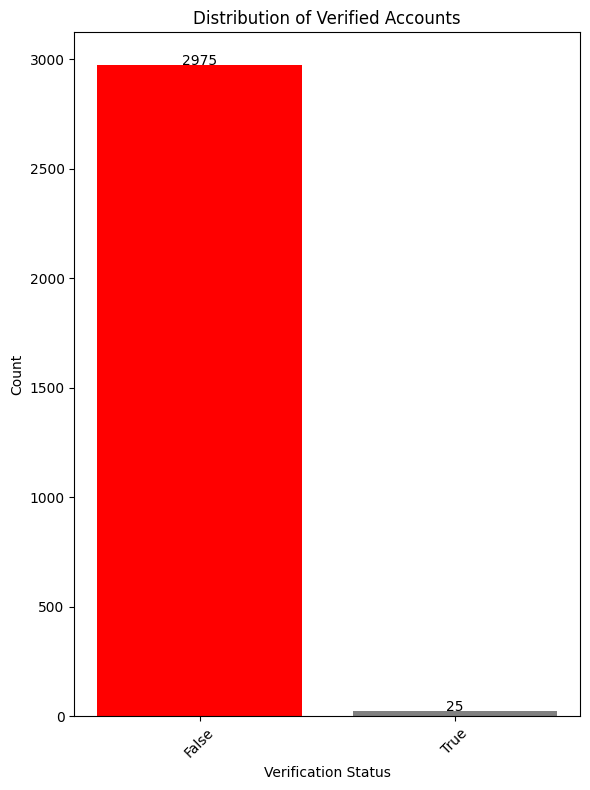

In [ ]:
import matplotlib.pyplot as plt

# Count the occurrences of each value in the 'verified' column
verification_counts = data['verified'].value_counts()
plt.figure(figsize=(6, 8))  # Adjust the figure size to fit the vertical layout

# Plotting the vertical bar chart
plt.bar(verification_counts.index.astype(str), verification_counts, color=['red', 'grey'])

# Giving the count to the top of each bar
for index, value in enumerate(verification_counts):
    plt.text(index, value + 0.1, str(value), ha='center')

plt.xlabel('Verification Status')
plt.ylabel('Count')
plt.title('Distribution of Verified Accounts')

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


# **Text Analytics**#

Showing the Top keywords in the dataset except a select few.

In [ ]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Downloading the NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Load your dataset into a pandas DataFrame
# Replace 'your_dataset.csv' with the actual file path of your dataset

# Preprocessing function
def preprocess_text(text):
    # Custom set of words to remove within the nike dataset
    remove_words = {'http', 'nike'}

    # Tokenization
    tokens = word_tokenize(text.lower())

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words and word.isalnum()]

    # Remove custom words
    filtered_tokens = [word for word in filtered_tokens if not any(rw in word for rw in remove_words)]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens]
    return lemmatized_tokens

# Extract descriptive words related to the brand
brand_keywords = []
for text in data['text']:
    tokens = preprocess_text(str(text))  # Convert to string to handle possible NaN values
    for token in tokens:
        if 'brand' in token:
            brand_keywords.extend(tokens)

# Count the occurrences of each keyword
keyword_counts = Counter(brand_keywords)

# Get the most common keywords
top_keywords = keyword_counts.most_common(30)

print("Top descriptive words related to the brand:")
for keyword, count in top_keywords:
    print(f"{keyword}: {count}")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Top descriptive words related to the brand:
style: 77
fashion: 76
check: 67
men: 65
brand: 57
designer: 50
shop: 49
shopping: 49
branded: 49
sale: 49
ebay: 47
via: 47
online: 47
size: 46
genuine: 46
mensfashion: 34
menswear: 34
trainer: 31
new: 31
sneaker: 30
poshmarkapp: 25
poshmark: 25
shopmycloset: 25
running: 25
good: 24
share: 24
item: 24
loving: 24
woman: 23
air: 22


Top Keyword visulisation

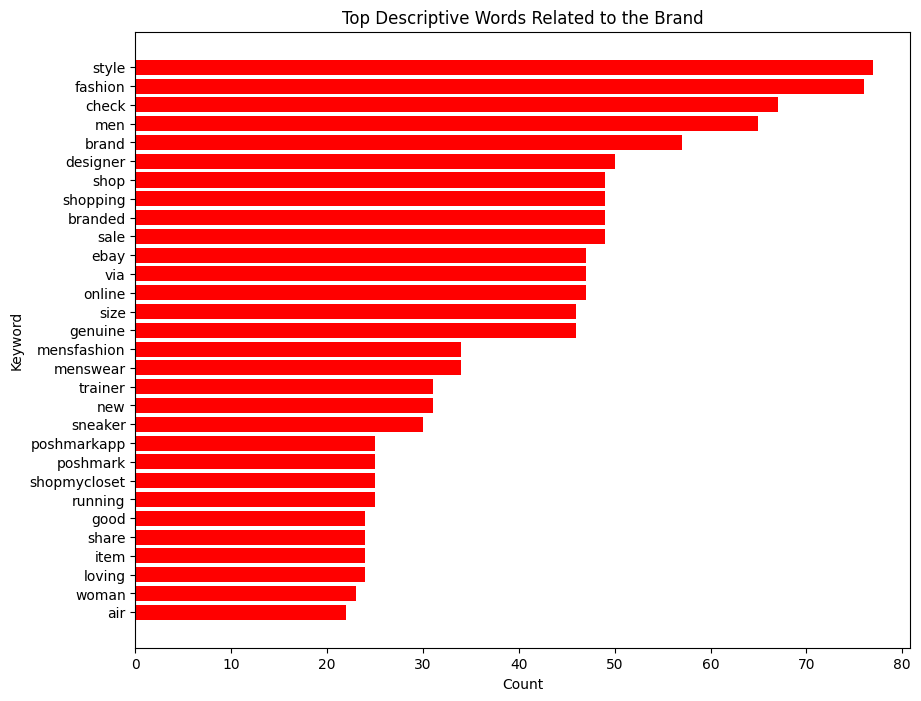

In [ ]:
# Extract keywords and their counts from the top_keywords list
keywords = [keyword[0] for keyword in top_keywords]
counts = [keyword[1] for keyword in top_keywords]

# Create a bar plot to display the distribution.
plt.figure(figsize=(10, 8))
plt.barh(keywords, counts, color='red')
plt.xlabel('Count')
plt.ylabel('Keyword')
plt.title('Top Descriptive Words Related to the Brand')
plt.gca().invert_yaxis()  # Invert y-axis to display the most frequent keywords.
plt.show()


Word Cloud

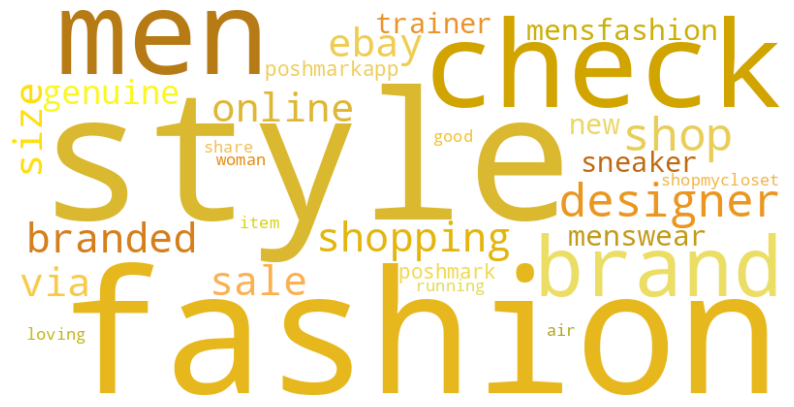

In [ ]:
from wordcloud import WordCloud
import numpy as np
import matplotlib.pyplot as plt

# Convert the list of tuples (keyword, count) to a dictionary
word_freq = {keyword: count for keyword, count in top_keywords}

# Define the color function
def reds_and_oranges(word, font_size, position, orientation, random_state=None, **kwargs):
    return f"hsl({30 + int(30 * random_state.random())}, {random_state.randint(70, 100)}%, {random_state.randint(40, 70)}%)"

# Create an object called wordcloud with custom colors
wordcloud = WordCloud(width=800, height=400, background_color='white', color_func=reds_and_oranges).generate_from_frequencies(word_freq)

# Plot the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


# **Sentiment Analytics**

In [ ]:
import nltk
# Download the NLTK library popular for the analysis
nltk.download('popular')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

True

Stop word removal and cleaning.

In [ ]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
import nltk
nltk.download('punkt')
import nltk
nltk.download('stopwords')

# Defining a function to remove stopwords and convert text to lowercase
def preprocess_text(text):
    # Tokenization of the text
    tokens = word_tokenize(text)
    # Stopword removal
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word.lower() for word in tokens if word.lower() not in stop_words and word.lower() not in string.punctuation]
    # Joining the tokens back into a single string
    processed_text = ' '.join(filtered_tokens)
    return processed_text

# Applying the preprocessing function to the 'text' column
data['text'] = data['text'].apply(preprocess_text)
data.head(10)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,author_id,statuses_count,verified,followers_count,friends_count,listed_count,favourites_count,tweet_id,text,created_at,retweet_count,hashtags,favorite_count
0,1630000000000000000,2,False,0,14,0,0,1630000000000000000,nike open sone //t.co/hklhhgg7cc,23/02/2023 23:59,0,"[{'text': 'Nike', 'indices': [0, 5]}]",0
1,1270000000000000000,387,False,39,120,0,1381,1630000000000000000,jordan year bhm bhmkotd jordan 23 jordan1og be...,23/02/2023 23:57,6,"[{'text': 'BHM', 'indices': [13, 17]}, {'text'...",31
2,1190000000000000000,409,False,19,23,0,22,1630000000000000000,nike dunk low teddy bear deadstock size 5w pri...,23/02/2023 23:56,0,"[{'text': 'simplysneakers', 'indices': [56, 71...",0
3,1400000000000000000,393,False,177,188,0,795,1630000000000000000,mapess – face album complet == //t.co/stkvgn0e...,23/02/2023 23:54,4,"[{'text': 'Mapess', 'indices': [65, 72]}, {'te...",5
4,1400000000000000000,393,False,177,188,0,795,1630000000000000000,landy – brave album complet == //t.co/stkvgn0e...,23/02/2023 23:54,4,"[{'text': 'landy', 'indices': [63, 69]}, {'tex...",5
5,1420000000000000000,1030,False,265,234,1,42,1630000000000000000,frank ocean performing “ nikes ” 👟 frankocean ...,23/02/2023 23:45,0,"[{'text': 'FrankOcean', 'indices': [34, 45]}, ...",2
6,1610000000000000000,3156,False,22,126,0,4,1630000000000000000,travisscott x nike sbdunk low premium special ...,23/02/2023 23:45,0,"[{'text': 'TravisScott', 'indices': [0, 12]}, ...",0
7,1420000000000000000,1030,False,265,234,1,42,1630000000000000000,nike dunk low `` super mario '' concept 🍄 nike...,23/02/2023 23:44,0,"[{'text': 'Nike', 'indices': [52, 57]}, {'text...",0
8,27523638,93687,False,1288,187,60,1782,1630000000000000000,3.10 miles 23.34 mins 7.36 pace fitness finish...,23/02/2023 23:43,0,"[{'text': 'fitness', 'indices': [35, 43]}, {'t...",0
9,1580000000000000000,276,False,29,101,0,399,1630000000000000000,’ cautiously optimistic vaporfly 3 early runne...,23/02/2023 23:43,0,"[{'text': 'nike', 'indices': [32, 37]}, {'text...",0


In [ ]:
!pip install newspaper3k
from textblob import TextBlob
from newspaper import Article
import nltk
import pandas as pd
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
data.head()

,author_id,statuses_count,verified,followers_count,friends_count,listed_count,favourites_count,tweet_id,text,created_at,retweet_count,hashtags,favorite_count
0,1630000000000000000,2,False,0,14,0,0,1630000000000000000,nike open sone //t.co/hklhhgg7cc,23/02/2023 23:59,0,"[{'text': 'Nike', 'indices': [0, 5]}]",0
1,1270000000000000000,387,False,39,120,0,1381,1630000000000000000,jordan year bhm bhmkotd jordan 23 jordan1og be...,23/02/2023 23:57,6,"[{'text': 'BHM', 'indices': [13, 17]}, {'text'...",31
2,1190000000000000000,409,False,19,23,0,22,1630000000000000000,nike dunk low teddy bear deadstock size 5w pri...,23/02/2023 23:56,0,"[{'text': 'simplysneakers', 'indices': [56, 71...",0
3,1400000000000000000,393,False,177,188,0,795,1630000000000000000,mapess – face album complet == //t.co/stkvgn0e...,23/02/2023 23:54,4,"[{'text': 'Mapess', 'indices': [65, 72]}, {'te...",5
4,1400000000000000000,393,False,177,188,0,795,1630000000000000000,landy – brave album complet == //t.co/stkvgn0e...,23/02/2023 23:54,4,"[{'text': 'landy', 'indices': [63, 69]}, {'tex...",5


Applying a sentiment analysis function to the text column.

In [ ]:
def categorize_sentiment(text):
    sentiment = TextBlob(text).sentiment.polarity
    if sentiment >= 0:
        return 'Positive'
    else:
        return 'Negative'

# Apply the categorize_sentiment function to the 'content' column and create a new 'Sentiment Analysis' column
data['Sentiment'] = data['text'].apply(categorize_sentiment)
data

,author_id,statuses_count,verified,followers_count,friends_count,listed_count,favourites_count,tweet_id,text,created_at,retweet_count,hashtags,favorite_count,Sentiment
0,1630000000000000000,2,False,0,14,0,0,1630000000000000000,nike open sone //t.co/hklhhgg7cc,23/02/2023 23:59,0,"[{'text': 'Nike', 'indices': [0, 5]}]",0,Positive
1,1270000000000000000,387,False,39,120,0,1381,1630000000000000000,jordan year bhm bhmkotd jordan 23 jordan1og be...,23/02/2023 23:57,6,"[{'text': 'BHM', 'indices': [13, 17]}, {'text'...",31,Positive
2,1190000000000000000,409,False,19,23,0,22,1630000000000000000,nike dunk low teddy bear deadstock size 5w pri...,23/02/2023 23:56,0,"[{'text': 'simplysneakers', 'indices': [56, 71...",0,Positive
3,1400000000000000000,393,False,177,188,0,795,1630000000000000000,mapess – face album complet == //t.co/stkvgn0e...,23/02/2023 23:54,4,"[{'text': 'Mapess', 'indices': [65, 72]}, {'te...",5,Positive
4,1400000000000000000,393,False,177,188,0,795,1630000000000000000,landy – brave album complet == //t.co/stkvgn0e...,23/02/2023 23:54,4,"[{'text': 'landy', 'indices': [63, 69]}, {'tex...",5,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,844359606,1304,False,12,9,0,0,1631200000000000000,good share check items 'm loving poshmarkapp p...,02/03/2023 07:30,0,"[{'text': 'poshmark', 'indices': [75, 84]}, {'...",0,Positive
2996,37267225,6447,False,200,1229,0,54,1631200000000000000,good share check items 'm loving poshmarkapp p...,02/03/2023 07:29,0,"[{'text': 'poshmark', 'indices': [75, 84]}, {'...",0,Positive
2997,864862000000000000,44,False,4,5,0,0,1631200000000000000,good share check items 'm loving poshmarkapp p...,02/03/2023 07:29,0,"[{'text': 'poshmark', 'indices': [75, 84]}, {'...",0,Positive
2998,889296000000000000,3641,False,56,177,1,175,1631200000000000000,good share check items 'm loving poshmarkapp t...,02/03/2023 07:29,0,"[{'text': 'poshmark', 'indices': [97, 106]}, {...",0,Positive


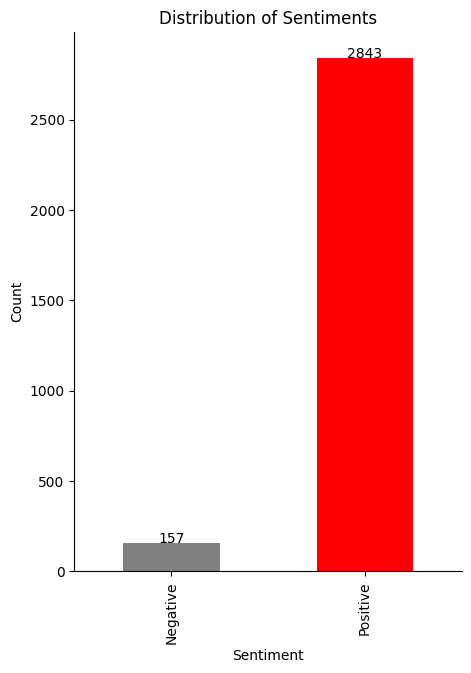

In [ ]:
#Plotting the distribution of the sentiments.
sentiment_counts = data.groupby('Sentiment').size()
plt.figure(figsize=(5,7))
ax = sentiment_counts.plot(kind='bar', color=['grey', 'red'])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

for i, count in enumerate(sentiment_counts):
    ax.text(i, count, str(count), ha='center')

plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Distribution of Sentiments')

plt.show()


In [ ]:
#remove any occurrences of 'Invited' or 'Updated', as well as any rows containing 'ago'. Then, convert the 'created_at' values to datetime format
# and re-formats them to 'mm/dd/yy' for consistency and ease of analysis.
data['created_at'] = data['created_at'].str.replace('Invited', '').str.replace('Updated', '').str.strip()
data = data[~data['created_at'].str.contains('ago')]
data['created_at'] = pd.to_datetime(data['created_at'])
data['created_at'] = data['created_at'].dt.strftime('%m/%d/%y')
data

<ipython-input-131-ccfe0e7766f9>:5: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['created_at'] = pd.to_datetime(data['created_at'])


,author_id,statuses_count,verified,followers_count,friends_count,listed_count,favourites_count,tweet_id,text,created_at,retweet_count,hashtags,favorite_count,Sentiment
0,1630000000000000000,2,False,0,14,0,0,1630000000000000000,nike open sone //t.co/hklhhgg7cc,02/23/23,0,"[{'text': 'Nike', 'indices': [0, 5]}]",0,Positive
1,1270000000000000000,387,False,39,120,0,1381,1630000000000000000,jordan year bhm bhmkotd jordan 23 jordan1og be...,02/23/23,6,"[{'text': 'BHM', 'indices': [13, 17]}, {'text'...",31,Positive
2,1190000000000000000,409,False,19,23,0,22,1630000000000000000,nike dunk low teddy bear deadstock size 5w pri...,02/23/23,0,"[{'text': 'simplysneakers', 'indices': [56, 71...",0,Positive
3,1400000000000000000,393,False,177,188,0,795,1630000000000000000,mapess – face album complet == //t.co/stkvgn0e...,02/23/23,4,"[{'text': 'Mapess', 'indices': [65, 72]}, {'te...",5,Positive
4,1400000000000000000,393,False,177,188,0,795,1630000000000000000,landy – brave album complet == //t.co/stkvgn0e...,02/23/23,4,"[{'text': 'landy', 'indices': [63, 69]}, {'tex...",5,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,844359606,1304,False,12,9,0,0,1631200000000000000,good share check items 'm loving poshmarkapp p...,03/02/23,0,"[{'text': 'poshmark', 'indices': [75, 84]}, {'...",0,Positive
2996,37267225,6447,False,200,1229,0,54,1631200000000000000,good share check items 'm loving poshmarkapp p...,03/02/23,0,"[{'text': 'poshmark', 'indices': [75, 84]}, {'...",0,Positive
2997,864862000000000000,44,False,4,5,0,0,1631200000000000000,good share check items 'm loving poshmarkapp p...,03/02/23,0,"[{'text': 'poshmark', 'indices': [75, 84]}, {'...",0,Positive
2998,889296000000000000,3641,False,56,177,1,175,1631200000000000000,good share check items 'm loving poshmarkapp t...,03/02/23,0,"[{'text': 'poshmark', 'indices': [97, 106]}, {...",0,Positive


In [ ]:
sentiment_over_time = data.groupby(['created_at', 'Sentiment']).size().unstack(fill_value=0)

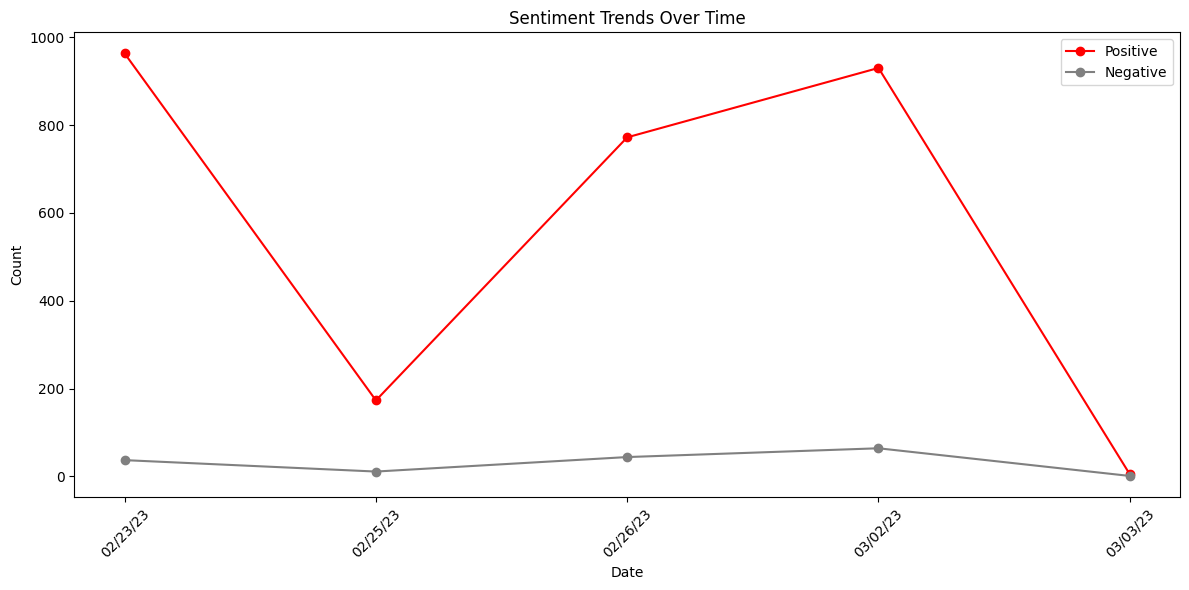

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(sentiment_over_time.index, sentiment_over_time['Positive'], label='Positive', marker='o',color='red')
plt.plot(sentiment_over_time.index, sentiment_over_time['Negative'], label='Negative', marker='o',color='grey')

plt.title('Sentiment Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.xticks(rotation=45)  # Rotate date labels for better readability
plt.tight_layout()  # Adjust layout to not cut off labels
plt.show()

# **Topics arising in the brand**#

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Top 10 words for each topic:
Topic 1:
shoes buy tagowear tagolife tagoteenet bishop sneakers jordan 13 air
Topic 2:
ebay fashion mens size style via online sale shopping shop
Topic 3:
black air dunk 1 low white jordan sneakers men amp
Topic 4:
fashion style good share check items shopmycloset poshmarkapp poshmark loving
Topic 5:
air jordan gt kotd snkrs sneakers sneakerhead yoursneakersaredope day snkrsliveheatingup


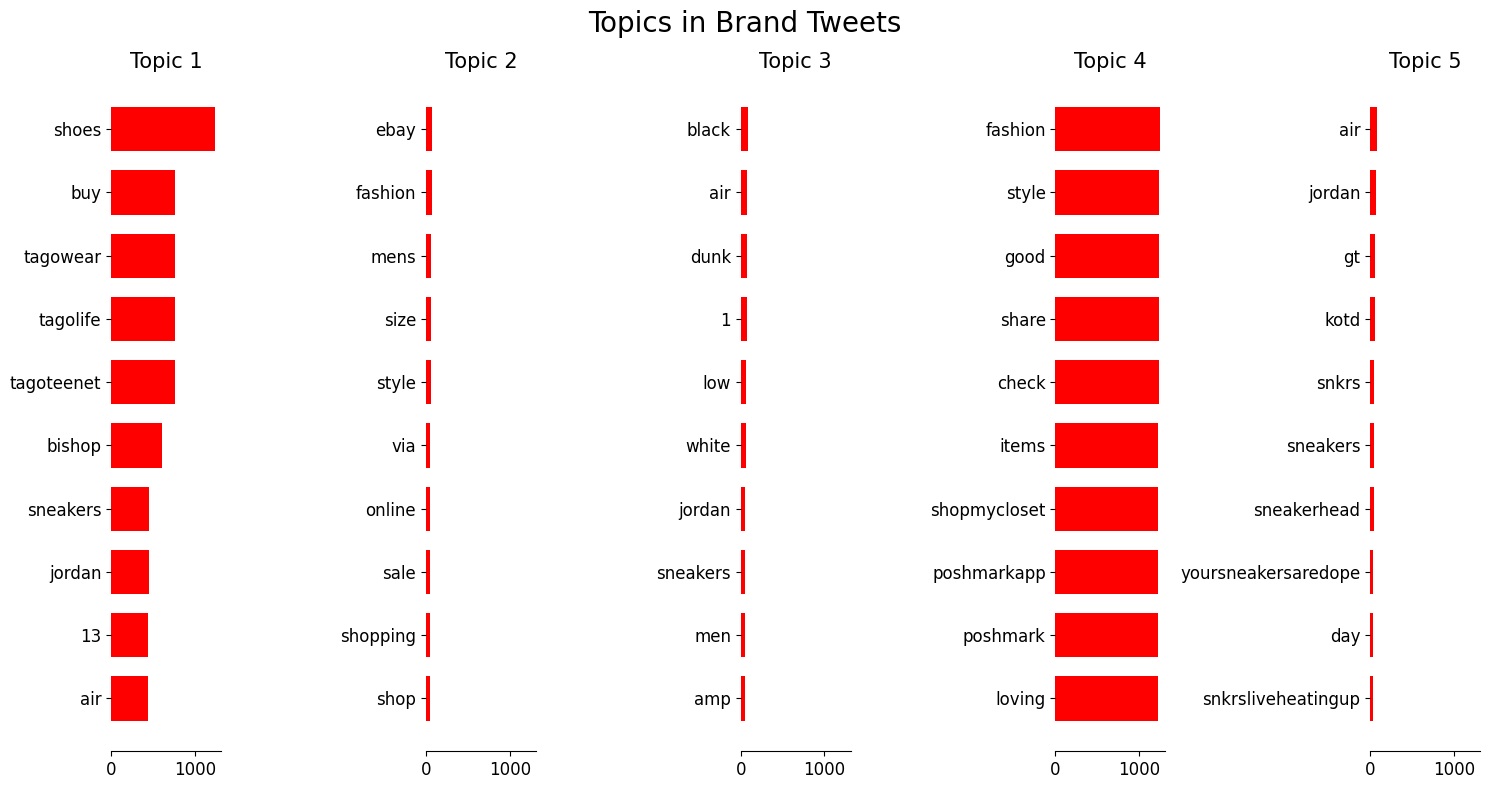

In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt

# Download NLTK resources
nltk.download('stopwords')
nltk.download('punkt')

# Text Preprocessing
def preprocess_text(text):
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Remove punctuation and special characters
    text = re.sub(r'[^\w\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    # Remove the word 'nike'
    text = re.sub(r'\bnike\b', '', text)
    return text

# Apply text preprocessing to the 'text' column
data['clean_text'] = data['text'].apply(preprocess_text)

# Tokenization and remove stopwords
stop_words = set(stopwords.words('english'))
def tokenize_text(text):
    tokens = word_tokenize(text)
    tokens = [token for token in tokens if token not in stop_words]
    return tokens

# Apply tokenization to the 'clean_text' column
data['tokens'] = data['clean_text'].apply(tokenize_text)

# Topic Modeling using LDA
vectorizer = CountVectorizer(tokenizer=lambda x: x, lowercase=False)
data_vectorized = vectorizer.fit_transform(data['tokens'])

# Define the number of topics
num_topics = 5

# Fit LDA model
lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda_output = lda_model.fit_transform(data_vectorized)

# Display the topics
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx + 1))
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

no_top_words = 10
print("Top %d words for each topic:" % no_top_words)
display_topics(lda_model, vectorizer.get_feature_names_out(), no_top_words)  # Use get_feature_names_out() instead of get_feature_names()

# Visualization
def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(1, num_topics, figsize=(15, 8), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]
        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7, color='red')  # Set color to red
        ax.set_title(f'Topic {topic_idx + 1}',
                     fontdict={'fontsize': 15})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=12)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=20)

plot_top_words(lda_model, vectorizer.get_feature_names_out(), no_top_words, 'Topics in Brand Tweets')
plt.tight_layout()
plt.show()


# **Micro Influencer**#

In [ ]:
import pandas as pd
# Calculate engagement
data['engagement'] = (data['favorite_count'] + data['retweet_count']) / data['followers_count']

# Engineer the audience reach feature
data['audience_reach'] = data['followers_count'] + data['friends_count'] + data['listed_count']

# Calculate the popularity score as a combination of engagement and audience reach
# Here we use a simple weighted sum, but this can be adjusted based on your criteria
data['popularity_score'] = (data['engagement'] * 0.5) + (data['audience_reach'] * 0.5)

# Drop duplicates to keep only unique author IDs, keeping the one with the highest popularity score
data_influ_unique = data.sort_values(by='popularity_score', ascending=False).drop_duplicates(subset=['author_id'], keep='first')

# Sort the DataFrame by verified status, audience reach, and engagement
data_influ_unique = data_influ_unique.sort_values(by=['verified', 'audience_reach', 'engagement'], ascending=[False, False, False])

# Display the DataFrame with unique author IDs and the added popularity score
data_influ_unique.head()


,author_id,statuses_count,verified,followers_count,friends_count,listed_count,favourites_count,tweet_id,text,created_at,retweet_count,hashtags,favorite_count,Sentiment,clean_text,tokens,engagement,audience_reach,popularity_score
924,17710740,714341,True,2300493,18,3581,133,1630000000000000000,gautamadani longer among world 's 25 richest f...,02/23/23,2,"[{'text': 'GautamAdani', 'indices': [0, 12]}, ...",3,Positive,gautamadani longer among world s 25 richest fo...,"[gautamadani, longer, among, world, 25, riches...",0,2304092,1152046
642,22175551,105491,True,742113,908,2553,10240,1630000000000000000,nike bringing heat morning new arrivals ladies...,02/23/23,1,"[{'text': 'Nike', 'indices': [0, 5]}]",10,Positive,bringing heat morning new arrivals ladies ch...,"[bringing, heat, morning, new, arrivals, ladie...",0,745574,372787
1003,243456489,21162,True,246281,181897,375,75523,1630000000000000000,apex amp opening pokemon packs armybaby1305 mi...,02/26/23,1,"[{'text': 'Armybaby1305', 'indices': [33, 46]}...",3,Positive,apex amp opening pokemon packs armybaby1305 mi...,"[apex, amp, opening, pokemon, packs, armybaby1...",0,428553,214277
352,98483308,39787,True,289269,0,541,4141,1630000000000000000,nike air max 1 prm `` soft grey '' release tom...,02/23/23,0,"[{'text': 'nike', 'indices': [175, 180]}, {'te...",29,Positive,air max 1 prm soft grey release tomorrow 22...,"[air, max, 1, prm, soft, grey, release, tomorr...",0,289810,144905
2570,36427202,75007,True,171997,1290,675,4202,1631320000000000000,release update 🚨 nike air foamposite one “ tec...,03/02/23,1,"[{'text': 'Nike', 'indices': [21, 26]}]",10,Positive,release update air foamposite one tech grey...,"[release, update, air, foamposite, one, tech, ...",0,173962,86981


In [ ]:
# remove the unwanted columns.
data_influ_unique.drop('tweet_id',axis=1, inplace = True)
data_influ_unique.drop('created_at',axis=1, inplace = True)
data_influ_unique.drop('retweet_count',axis=1, inplace = True)
data_influ_unique.drop('hashtags',axis=1, inplace = True)
data_influ_unique.drop('engagement',axis=1, inplace = True)
data_influ_unique.drop('clean_text',axis=1, inplace = True)
data_influ_unique.drop('tokens',axis=1, inplace = True)
data_influ_unique.drop('favourites_count',axis=1, inplace = True)
data_influ_unique.drop('listed_count',axis=1, inplace = True)
data_influ_unique.drop('friends_count',axis=1, inplace = True)
data_influ_unique.drop('statuses_count',axis=1, inplace = True)
data_influ_unique.drop('favorite_count',axis=1, inplace = True)

In [ ]:
data_influ_unique.head(10)

,author_id,verified,followers_count,text,Sentiment,audience_reach,popularity_score
924,17710740,True,2300493,gautamadani longer among world 's 25 richest f...,Positive,2304092,1152046
642,22175551,True,742113,nike bringing heat morning new arrivals ladies...,Positive,745574,372787
1003,243456489,True,246281,apex amp opening pokemon packs armybaby1305 mi...,Positive,428553,214277
352,98483308,True,289269,nike air max 1 prm `` soft grey '' release tom...,Positive,289810,144905
2570,36427202,True,171997,release update 🚨 nike air foamposite one “ tec...,Positive,173962,86981
361,130548917,True,93023,📦 📦 question moving right direction 🚚 🚚 nike i...,Positive,96119,48060
645,1050000000000000000,True,29786,start day 🔥 drops nike lot dope drops ladies a...,Positive,30232,15116
2401,137189535,True,11998,either experience pain discipline pain regret ...,Positive,22537,11269
2055,36359553,True,12107,artemis back 🤗 ’ even “ kick ” ball ’ already ...,Positive,12339,6170
1927,2854037512,True,8061,dailycollegian pcykosky students members penns...,Positive,11984,5992


In [ ]:
# Creating a micro influencer data where everyone who has more than 100000 followers are excluded
micro_influ_data = data_influ_unique[data_influ_unique['followers_count'] <= 100000]
micro_influ_data = micro_influ_data.sort_values(by= ['verified','audience_reach','popularity_score'], ascending=[False, False,False] )
micro_influ_data.head(10)

,author_id,verified,followers_count,text,Sentiment,audience_reach,popularity_score
361,130548917,True,93023,📦 📦 question moving right direction 🚚 🚚 nike i...,Positive,96119,48060
645,1050000000000000000,True,29786,start day 🔥 drops nike lot dope drops ladies a...,Positive,30232,15116
2401,137189535,True,11998,either experience pain discipline pain regret ...,Positive,22537,11269
2055,36359553,True,12107,artemis back 🤗 ’ even “ kick ” ball ’ already ...,Positive,12339,6170
1927,2854037512,True,8061,dailycollegian pcykosky students members penns...,Positive,11984,5992
1460,2304868688,True,6227,white nike af1 's matching set obsessed 🤩 cop ...,Positive,6276,3138
448,55571379,False,96189,keep blue icey 🧊 🧊 ice blue swoosh ugc shop ic...,Positive,96434,48217
1924,1411447658,False,86755,feet look nike air max plus ‘ baltic blue ’ 🧊 ...,Positive,87693,43847
917,3063816963,False,75069,nike dunk high 1985 'albaster online shop //t....,Positive,75120,37560
1224,226033749,False,35073,memorable moments matter memories memory memor...,Positive,70070,35035


In [ ]:
micro_influ_data.shape[0]

1145